In [1]:
from superminddpm import DDPM, DummyEpsModel
import torch
import matplotlib.pyplot as plt
from mindiffusion.ddim import DDIM
from utils import plot_samples

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DDIM(eps_model=DummyEpsModel(1), betas=(1e-4, 0.02), eta=0, n_T=1000)
model.load_state_dict(torch.load("./contents/ddpm_mnist.pth", map_location=device))
model.to(device)
model.eval();

In [15]:
n_sample = 4
size = (1, 28, 28)
starting_noise = torch.randn(1, *size).to(device).repeat((n_sample, 1, 1, 1))
with torch.no_grad():
    x = model.sample(n_sample, size, device, starting_noise=starting_noise)

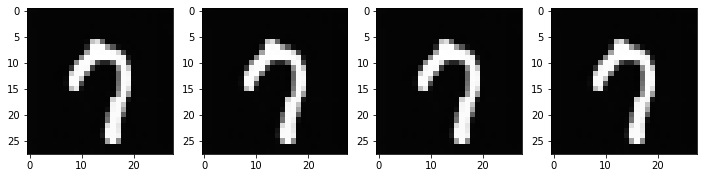

In [16]:
plot_samples(x)